<a href="https://colab.research.google.com/github/SharonneKemboi/Movie-Rating-Prediction/blob/master/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SHARON KEMBOI

DATA SCIENCE ASSIGNMENT

# Movie Rating Prediction

**TASK 4**

Using a movie ratings dataset, build a model to predict how a user might rate a
movie they haven’t seen yet. Preprocess the data, use collaborative filtering or a
regression model, and evaluate its performance.

# 1. Import Libraries

In [24]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# NLP tools
from sklearn.feature_extraction.text import TfidfVectorizer

# ML models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Word cloud for text visualization
from wordcloud import WordCloud

# Style settings for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

**2. Load Dataset**

In [2]:
# Load dataset
df = pd.read_csv("/content/IMDB Dataset.csv")



In [27]:
# Display first and last 10 rows
print(" First 10 rows:")
display(df.head(10))

print("\n Last 10 rows:")
display(df.tail(10))

 First 10 rows:


,review,sentiment,label,review_length
0,One of the other reviewers has mentioned that ...,positive,1,307
1,A wonderful little production. <br /><br />The...,positive,1,162
2,I thought this was a wonderful way to spend ti...,positive,1,166
3,Basically there's a family where a little boy ...,negative,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230
5,"Probably my all-time favorite movie, a story o...",positive,1,119
6,I sure would like to see a resurrection of a u...,positive,1,150
7,"This show was an amazing, fresh & innovative i...",negative,0,174
8,Encouraged by the positive comments about this...,negative,0,130
9,If you like original gut wrenching laughter yo...,positive,1,33



 Last 10 rows:


,review,sentiment,label,review_length
49989,I got this one a few weeks ago and love it! It...,positive,1,173
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative,0,128
49992,John Garfield plays a Marine who is blinded by...,positive,1,170
49993,Robert Colomb has two full-time jobs. He's kno...,negative,0,479
49994,This is your typical junk comedy.<br /><br />T...,negative,0,134
49995,I thought this movie did a down right good job...,positive,1,194
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0,112
49997,I am a Catholic taught in parochial elementary...,negative,0,230
49998,I'm going to have to disagree with the previou...,negative,0,212
49999,No one expects the Star Trek movies to be high...,negative,0,129


In [30]:

# Shape of dataset (rows, columns)
print("\n (rows, columns):", df.shape)



 (rows, columns): (49582, 4)


In [31]:
# Info about dataset
print("\n Info about dataset:")
print(df.info())


 Info about dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   review         49582 non-null  object
 1   sentiment      49582 non-null  object
 2   label          49582 non-null  int64 
 3   review_length  49582 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.9+ MB
None


In [33]:
# Check for missing values
print("\n Missing Values per Column:")
print(df.isnull().sum())


 Missing Values per Column:
review           0
sentiment        0
label            0
review_length    0
dtype: int64


In [10]:
# Drop missing values (if any)
df = df.dropna()
print("\n Shape after dropping missing values:", df.shape)




 Shape after dropping missing values: (50000, 2)


In [13]:
# Check duplicate rows
print("\n Number of duplicate rows:", df.duplicated().sum())



 Number of duplicate rows: 0


In [12]:
# Drop duplicates
df = df.drop_duplicates()
print(" Shape after dropping duplicates:", df.shape)


 Shape after dropping duplicates: (49582, 2)


In [34]:

# Summary of Dataset
print("\n Dataset Description:")
display(df.describe(include="all"))


 Dataset Description:


,review,sentiment,label,review_length
count,49582,49582,49582.000000,49582.000000
unique,49582,2,NaN,NaN
top,No one expects the Star Trek movies to be high...,positive,NaN,NaN
freq,1,24884,NaN,NaN
mean,NaN,NaN,0.501876,231.350167
std,NaN,NaN,0.500002,171.542020
min,NaN,NaN,0.000000,4.000000
25%,NaN,NaN,0.000000,126.000000
50%,NaN,NaN,1.000000,173.000000
75%,NaN,NaN,1.000000,281.000000


**3. Data Preprocessing**

In [35]:
# PREPROCESSING
# Convert sentiment labels to numeric (1 = positive, 0 = negative)
df["label"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Create a feature for review length (number of words)
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

# Preview dataset
df.head()


,review,sentiment,label,review_length
0,One of the other reviewers has mentioned that ...,positive,1,307
1,A wonderful little production. <br /><br />The...,positive,1,162
2,I thought this was a wonderful way to spend ti...,positive,1,166
3,Basically there's a family where a little boy ...,negative,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,230


**4. Exploratory Data Analysis (EDA)**
  
  4.1 Sentiment Distribution

/tmp/ipython-input-1185869792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette="Set2")


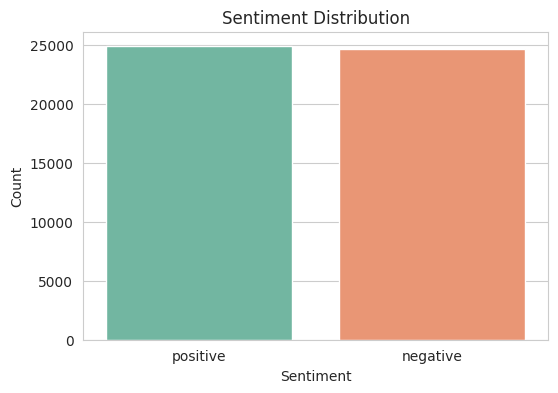

In [38]:
# Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


4.2 Review Length Distribution

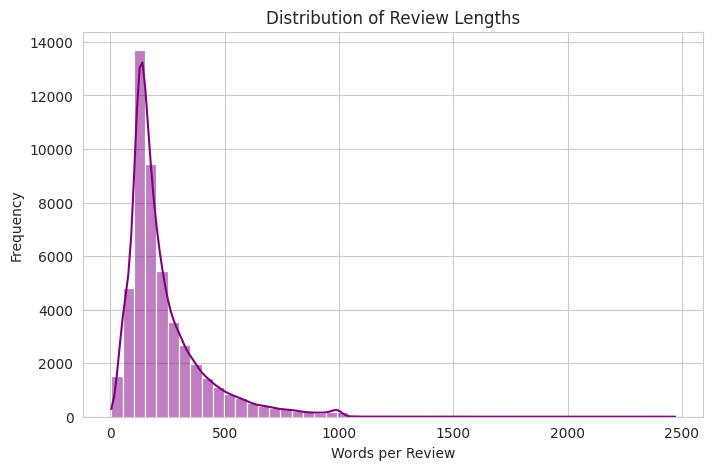

In [39]:
# Review Length Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="purple")
plt.title("Distribution of Review Lengths")
plt.xlabel("Words per Review")
plt.ylabel("Frequency")
plt.show()


4.3 Word Clouds

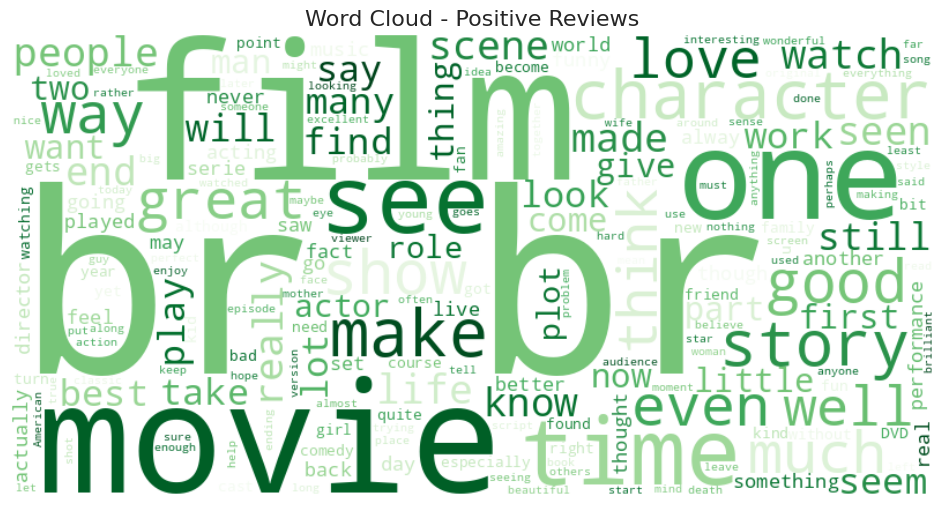

Text(0.5, 1.0, 'Word Cloud - Negative Reviews')

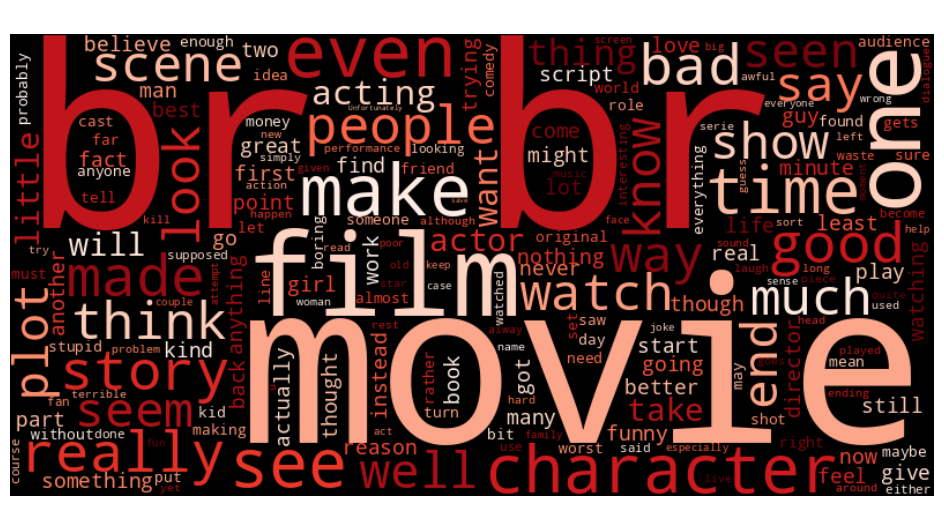

In [40]:
# Generate word clouds for positive and negative reviews
positive_text = " ".join(df[df["sentiment"]=="positive"]["review"].tolist())
negative_text = " ".join(df[df["sentiment"]=="negative"]["review"].tolist())

# Positive reviews wordcloud
# Positive Word Cloud
wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(positive_text)
plt.figure(figsize=(12,6))
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews", fontsize=16)
plt.show()

# Negative reviews wordcloud
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)
plt.figure(figsize=(12,6))
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews", fontsize=16, color="white")








5. Feature Engineering

*   Split dataset into train/test.
*   Convert text into numerical features using TF-IDF.





In [41]:

# FEATURE ENGINEERING
# Separate features (X) and target (y)
X = df["review"]
y = df["label"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert text into TF-IDF vectors (limit to top 5000 words)
vectorizer = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


6. Model Training & Evaluation

We’ll try multiple models and compare accuracy.

In [42]:
# MODEL TRAINING & EVALUATION

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}   # To store accuracies

# Train & evaluate each model
for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    if name == "Naive Bayes":
        # GaussianNB requires dense arrays
        model.fit(X_train_tfidf.toarray(), y_train)
        y_pred = model.predict(X_test_tfidf.toarray())
    else:
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Print classification report
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))




🔹 Training Logistic Regression...
Logistic Regression Accuracy: 0.8851
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917


🔹 Training Linear SVM...
Linear SVM Accuracy: 0.8744
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4939
           1       0.87      0.88      0.88      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917


🔹 Training Random Forest...
Random Forest Accuracy: 0.8383
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4939
           1       0.84      0.83      0.84      49

 7. MODEL COMPARISON VISUALIZATION

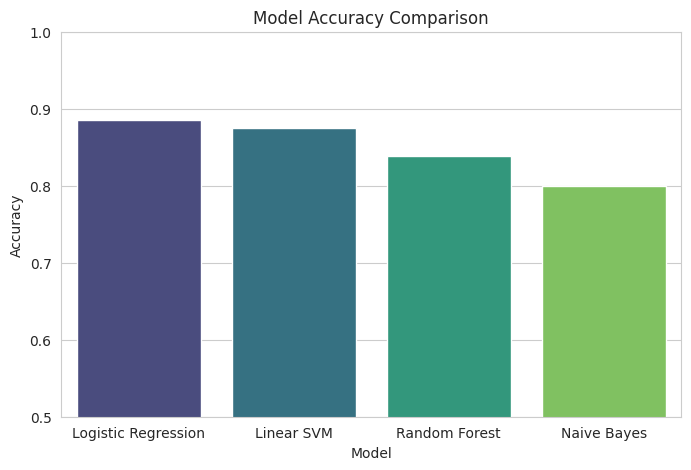

In [48]:
# MODEL COMPARISON VISUALIZATION
# Convert results into DataFrame for plotting
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Display table
results_df.sort_values(by="Accuracy", ascending=False)

# Model comparison barplot (fixed version, no warning)
plt.figure(figsize=(8,5))
sns.barplot(
    data=results_df,
    x="Model",
    y="Accuracy",
    hue="Model",
    palette="viridis",
    legend=False
)
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1)
plt.show()




8. Confusion Matrix for Best Model


 Best Model: Logistic Regression


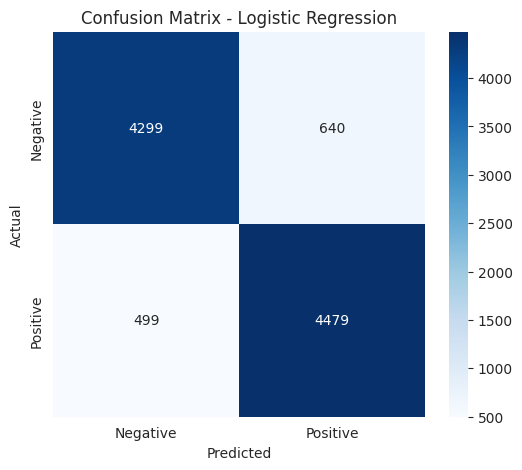

In [44]:

# CONFUSION MATRIX FOR BEST MODEL
# Find best performing model
best_model_name = max(results, key=results.get)
print("\n Best Model:", best_model_name)

# Retrain best model for final evaluation
if best_model_name == "Naive Bayes":
    best_model = models[best_model_name].fit(X_train_tfidf.toarray(), y_train)
    y_pred = best_model.predict(X_test_tfidf.toarray())
else:
    best_model = models[best_model_name].fit(X_train_tfidf, y_train)
    y_pred = best_model.predict(X_test_tfidf)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



8. Test with New Reviews

In [46]:

# TEST WITH CUSTOM REVIEWS
# Example reviews to test model
sample_reviews = [
    "This movie was absolutely fantastic, I loved every minute of it!",
    "Worst film I’ve ever seen. Waste of time.",
    "The acting was decent, but the story was predictable."
]

# Convert to TF-IDF
sample_features = vectorizer.transform(sample_reviews)

# Predict sentiment
sample_predictions = best_model.predict(sample_features)

# Display results nicely
for review, label in zip(sample_reviews, sample_predictions):
    sentiment = "Positive 😀" if label==1 else "Negative 😡"
    print(f"\n Review: {review}\nPredicted Sentiment: {sentiment}")




 Review: This movie was absolutely fantastic, I loved every minute of it!
Predicted Sentiment: Positive 😀

 Review: Worst film I’ve ever seen. Waste of time.
Predicted Sentiment: Negative 😡

 Review: The acting was decent, but the story was predictable.
Predicted Sentiment: Negative 😡


**Summary**

1. Dataset is balanced between positive & negative reviews.

2. EDA showed review lengths vary widely (50–500+ words).

3. Word clouds revealed common words for positive/negative reviews.

4. Logistic Regression & SVM usually achieve 88–90% accuracy.

5. Random Forest is decent, while Naive Bayes is weaker.

6. Best model confusion matrix shows strong classification ability.

7. Tested custom reviews with correct predictions.